### Checking GPU

In [1]:
!nvidia-smi

Thu Jun 29 05:53:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **Installing YOLO - V8**

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 11.8 MB/s eta 0:00:00


In [3]:
# Checking the working
!yolo predict model=yolov8n.pt source="https://ultralytics.com/images/bus.jpg"

100% 6.23M/6.23M [00:00<00:00, 80.0MB/s]
Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 476k/476k [00:00<00:00, 13.7MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 118.4ms
Speed: 14.9ms preprocess, 118.4ms inference, 44.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [6]:
# Importing YOLO from ultralytics

from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 104k/104k [00:00<00:00, 83.5MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 77.8ms
Speed: 3.2ms preprocess, 77.8ms inference, 107.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict2


### **Custom Data training**

In [8]:
# Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
%cd /content/drive/MyDrive/RT

/content/drive/MyDrive/RT


In [10]:
!ls

data  data.yaml  runs  YOLO-v8.ipynb


In [11]:
%cd /content/drive/MyDrive/RT

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/RT
100% 21.5M/21.5M [00:00<00:00, 128MB/s] 
Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

In [12]:
!ls runs/detect/train2/

args.yaml					    R_curve.png
confusion_matrix_normalized.png			    results.csv
confusion_matrix.png				    results.png
events.out.tfevents.1688018558.e54ad8cb32ce.2848.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
labels_correlogram.jpg				    train_batch2.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    weights


### Visulization

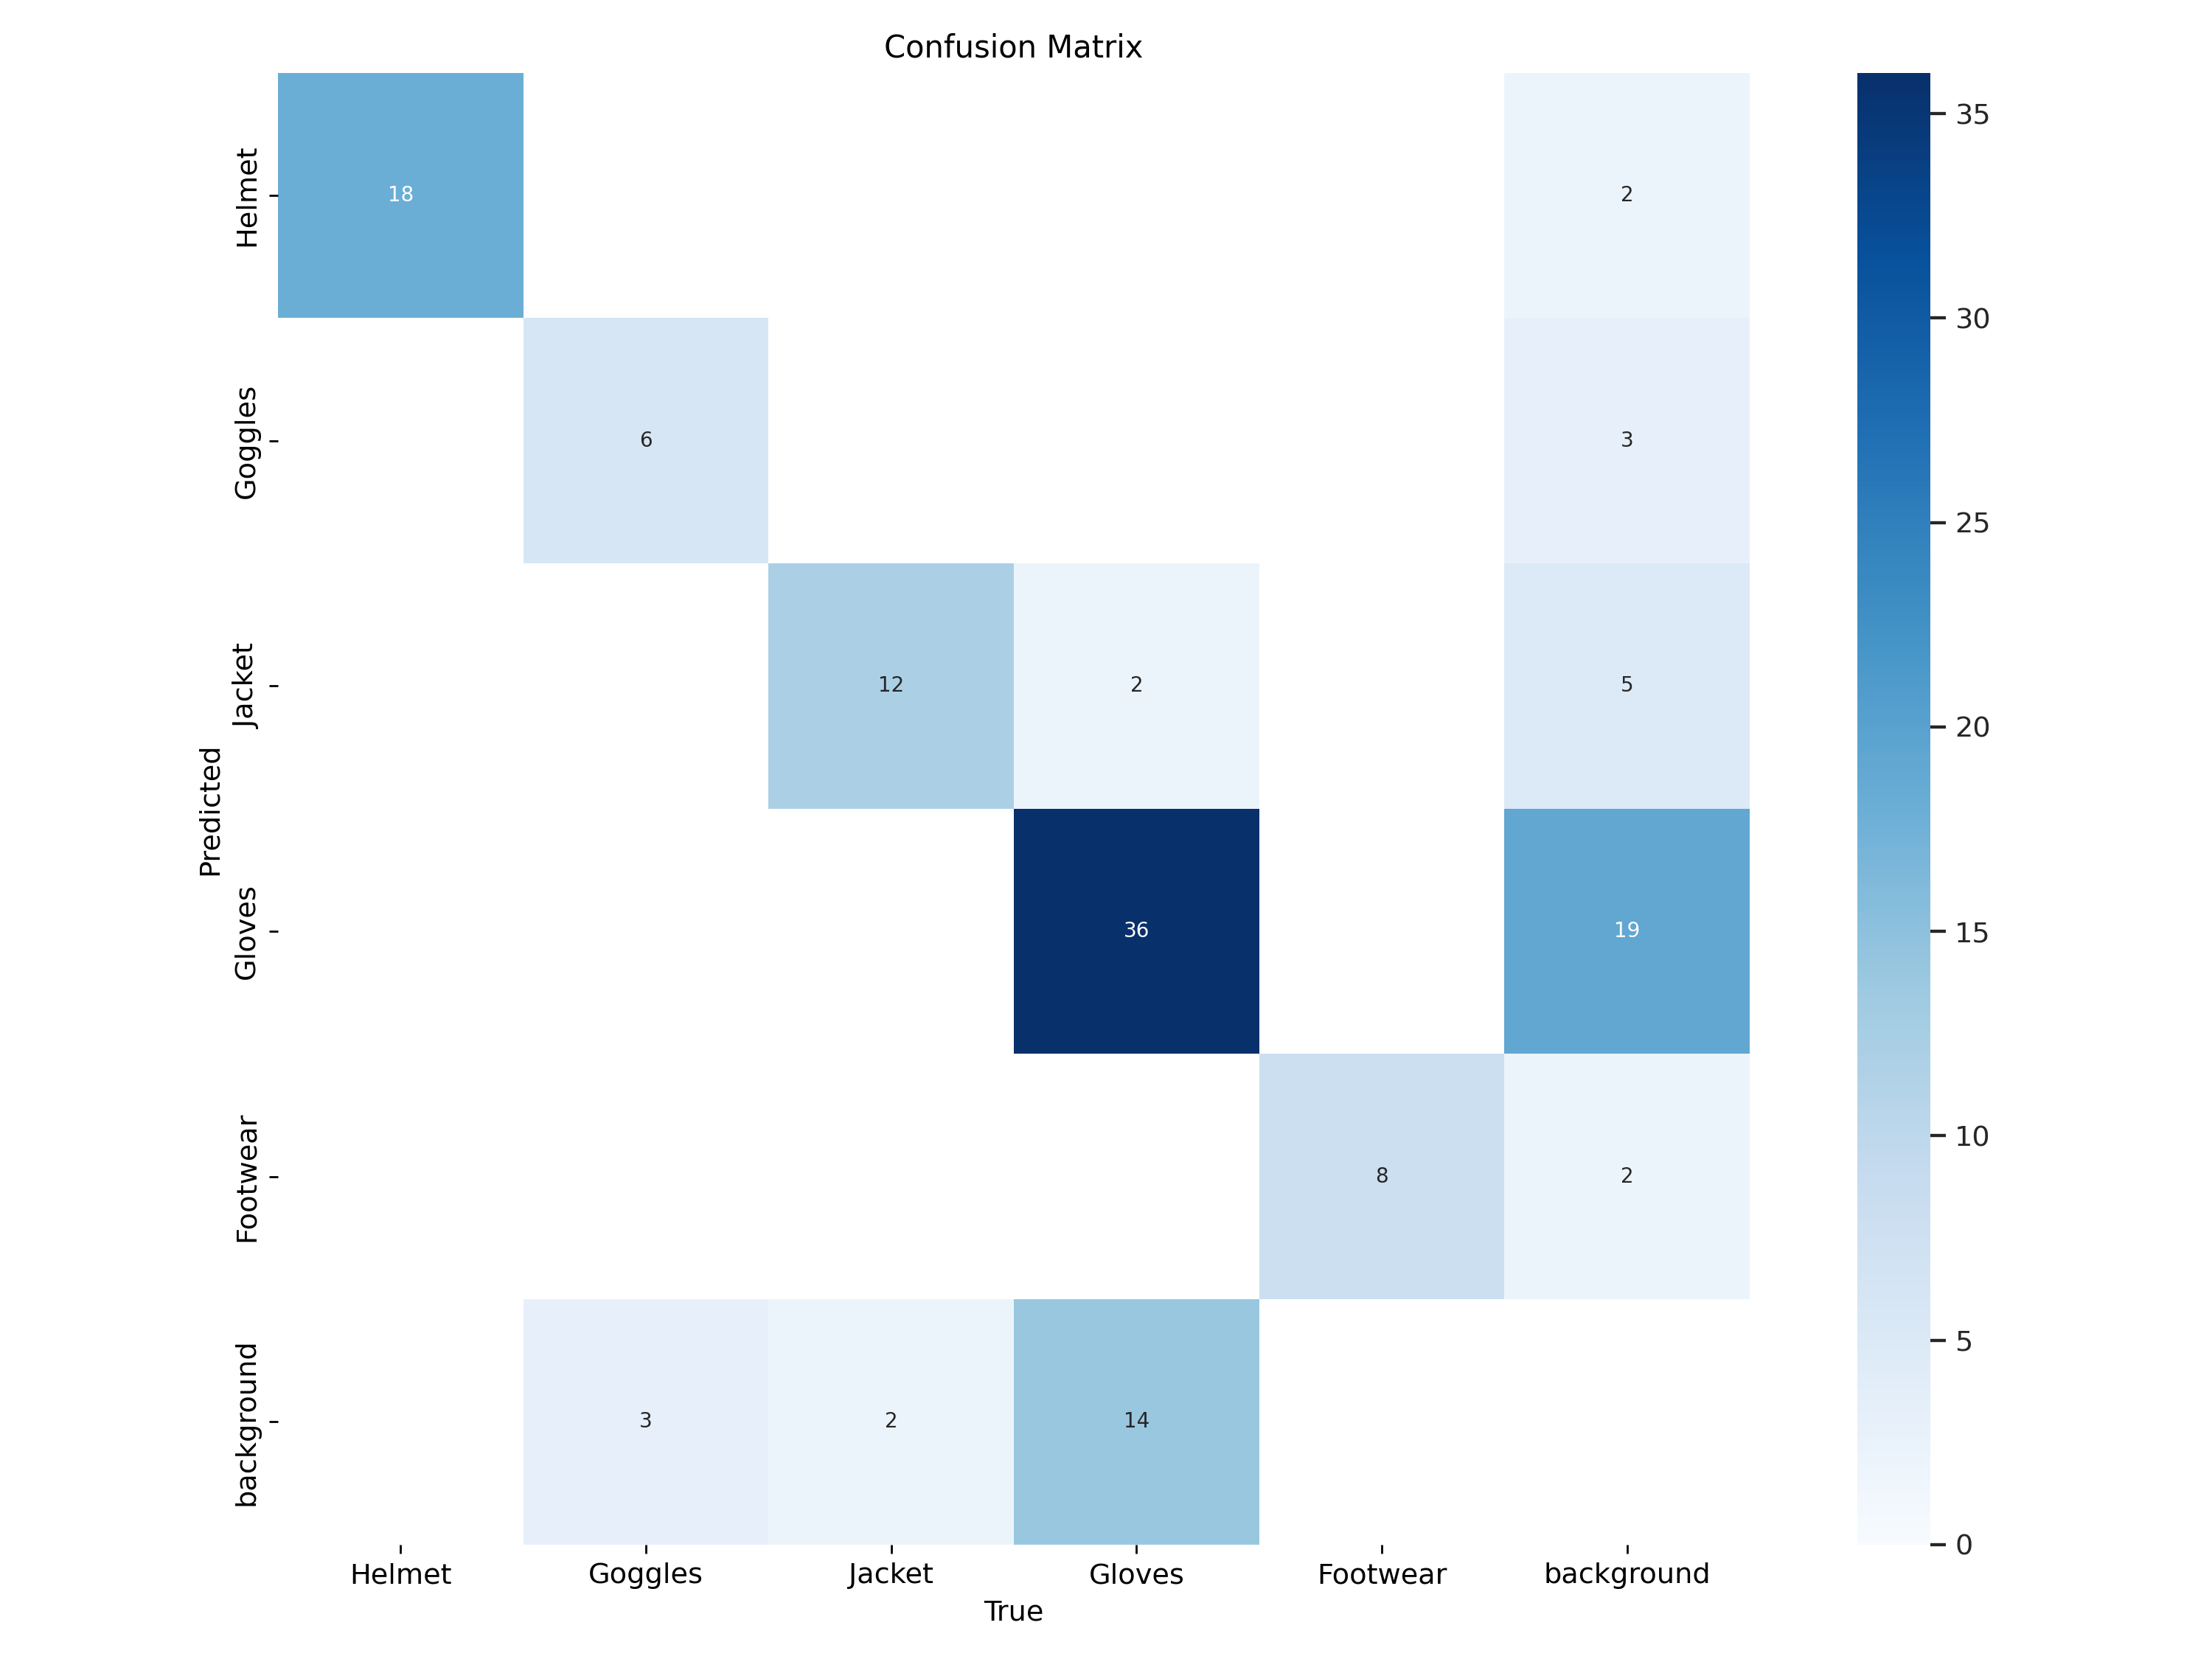

In [13]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

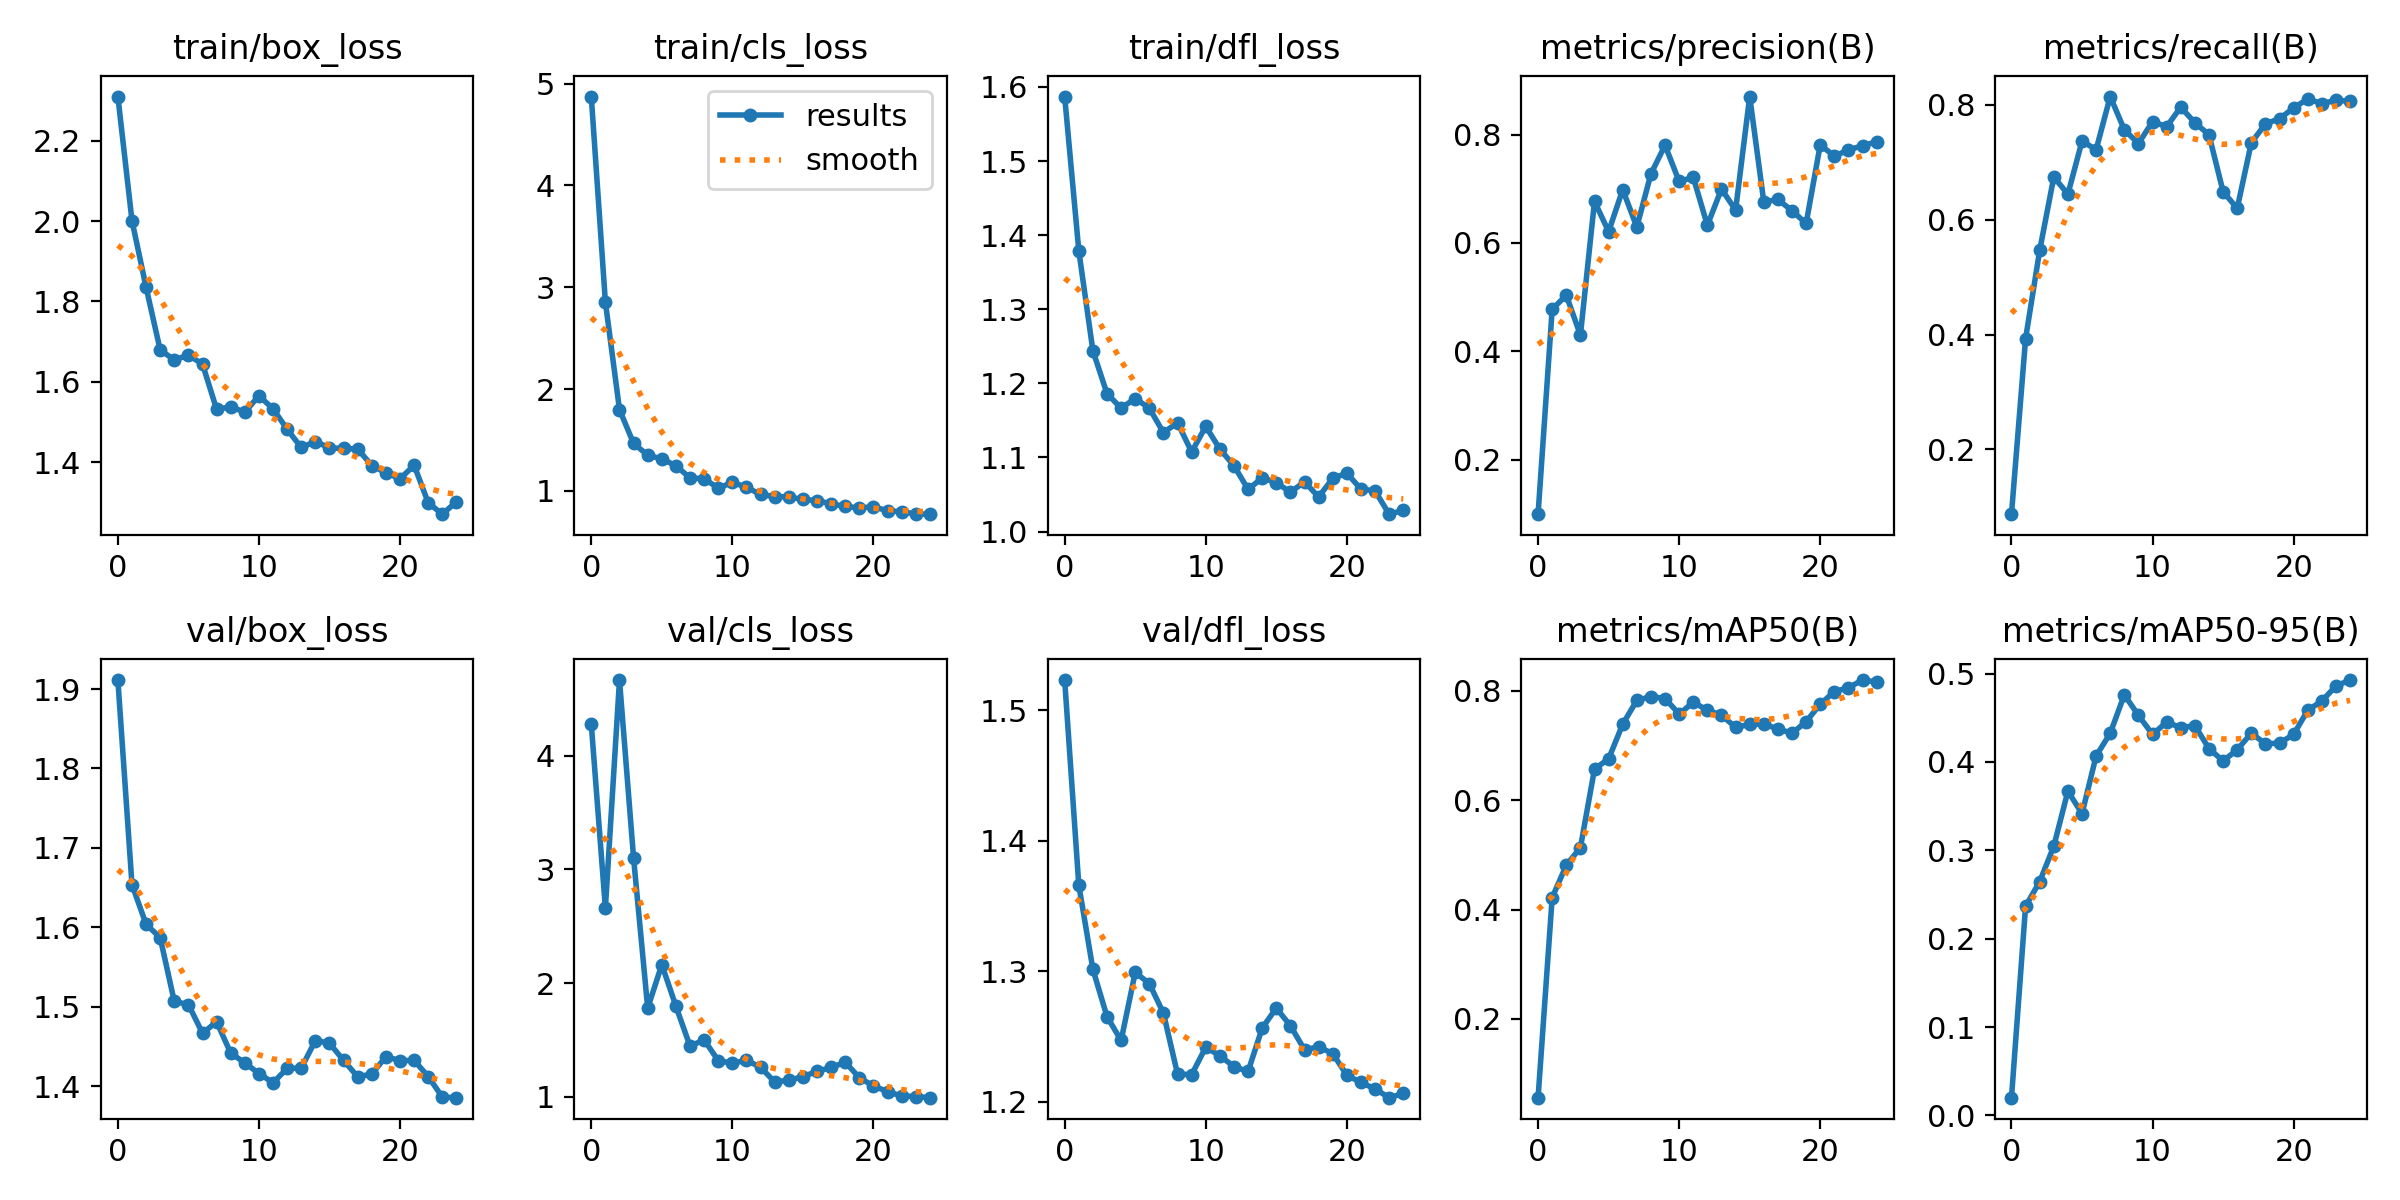

In [14]:
Image(filename='runs/detect/train2/results.png', width=600)

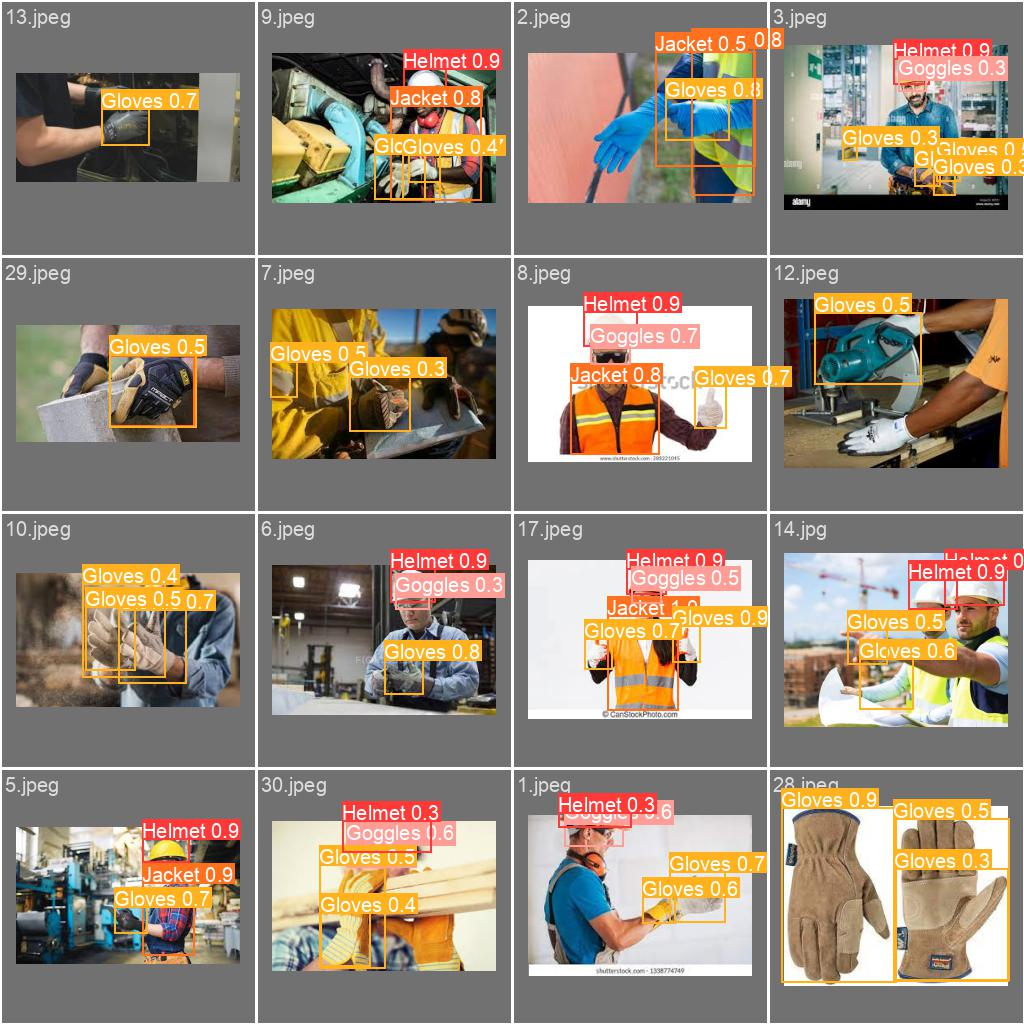

In [15]:
 Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

### Test

In [18]:
!yolo task=detect mode=val model=/content/drive/MyDrive/RT/runs/detect/train2/weights/best.pt data= data.yaml

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/RT/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.35it/s]
                   all         31        101      0.775      0.793       0.81        0.5
                Helmet         31         18      0.947          1      0.995      0.684
               Goggles         31          9      0.675      0.464      0.488      0.301
                Jacket         31         14       0.62      0.857      0.815      0.596
                Gloves         31         52       0.72      0.642      0.755      0.408
              Footwear         31          8      0.914          1      0.995      0.513
Speed: 0.4ms preprocess, 34.7ms inference, 0.0ms loss,

### Inference with custom data

In [19]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/RT/runs/detect/train2/weights/best.pt data= data.yaml conf=0.25 source=/content/drive/MyDrive/RT/data/test/images

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients

image 1/31 /content/drive/MyDrive/RT/data/test/images/1.jpeg: 192x224 1 Goggles, 2 Glovess, 72.5ms
image 2/31 /content/drive/MyDrive/RT/data/test/images/10.jpeg: 160x224 3 Glovess, 75.1ms
image 3/31 /content/drive/MyDrive/RT/data/test/images/11.jpeg: 224x224 4 Glovess, 9.4ms
image 4/31 /content/drive/MyDrive/RT/data/test/images/12.jpeg: 192x224 2 Glovess, 8.8ms
image 5/31 /content/drive/MyDrive/RT/data/test/images/13.jpeg: 128x224 1 Gloves, 71.7ms
image 6/31 /content/drive/MyDrive/RT/data/test/images/14(1).jpeg: 224x224 1 Jacket, 1 Gloves, 14.8ms
image 7/31 /content/drive/MyDrive/RT/data/test/images/14.jpg: 192x224 2 Helmets, 3 Jackets, 2 Glovess, 10.5ms
image 8/31 /content/drive/MyDrive/RT/data/test/images/15.jpeg: 224x224 3 Jackets, 8.8ms
image 9/31 /content/drive/MyDrive/RT/data/test/images/16.jpeg: 224x160 1 Helmet, 1 Goggles, 